In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
volve = pd.read_csv('vpd.csv')

In [3]:
volve.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15634 entries, 0 to 15633
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   15634 non-null  object 
 1   NPD_WELL_BORE_CODE        15634 non-null  int64  
 2   NPD_WELL_BORE_NAME        15634 non-null  object 
 3   ON_STREAM_HRS             15349 non-null  float64
 4   AVG_DOWNHOLE_PRESSURE     8980 non-null   float64
 5   AVG_DOWNHOLE_TEMPERATURE  8980 non-null   float64
 6   AVG_DP_TUBING             8980 non-null   float64
 7   AVG_ANNULUS_PRESS         7890 non-null   float64
 8   AVG_CHOKE_SIZE_P          8919 non-null   float64
 9   AVG_CHOKE_UOM             9161 non-null   object 
 10  AVG_WHP_P                 9155 non-null   float64
 11  AVG_WHT_P                 9146 non-null   float64
 12  DP_CHOKE_SIZE             15340 non-null  float64
 13  BORE_OIL_VOL              9161 non-null   float64
 14  BORE_G

In [4]:
volve.describe()

,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,BORE_WI_VOL
count,15634.000000,15349.000000,8980.000000,8980.000000,8980.000000,7890.000000,8919.000000,9155.000000,9146.00000,15340.000000,9161.000000,9161.000000,9161.000000,5706.000000
mean,5908.581745,19.994172,181.803870,77.162970,154.028791,14.856100,55.168534,45.377815,67.72844,11.441063,1095.638031,161049.063094,1672.152931,5315.479145
std,649.231622,8.369911,109.712365,45.657949,76.752381,8.406821,36.692924,24.752635,27.71903,19.816930,1323.541545,188136.409296,1706.980951,2181.487231
min,5351.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-458.000000,0.000000
25%,5599.000000,24.000000,0.000000,0.000000,83.665000,10.841250,18.952990,31.148000,56.57775,0.000000,191.000000,29431.000000,20.000000,4338.250000
50%,5693.000000,24.000000,232.897000,103.186500,175.589000,16.308500,52.096880,37.934000,80.07150,2.385000,558.000000,87750.000000,1098.000000,5504.500000
75%,5769.000000,24.000000,255.401250,106.277000,204.320000,21.306500,99.924290,57.101500,88.06200,13.765250,1345.000000,202482.000000,3261.000000,6780.750000
max,7405.000000,25.000000,397.589000,108.502000,345.907000,30.020000,100.000000,137.311000,93.51000,125.719000,5902.000000,851132.000000,8020.000000,10014.000000


In [5]:
volve.shape

(15634, 19)

In [6]:
volve.columns

Index(['DATEPRD', 'NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_CHOKE_UOM', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL', 'BORE_WI_VOL', 'FLOW_KIND', 'WELL_TYPE'],
      dtype='object')

In [7]:
print(volve['NPD_WELL_BORE_NAME'].value_counts())

15/9-F-4       3327
15/9-F-5       3306
15/9-F-12      3056
15/9-F-14      3056
15/9-F-11      1165
15/9-F-15 D     978
15/9-F-1 C      746
Name: NPD_WELL_BORE_NAME, dtype: int64


C:\Users\acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


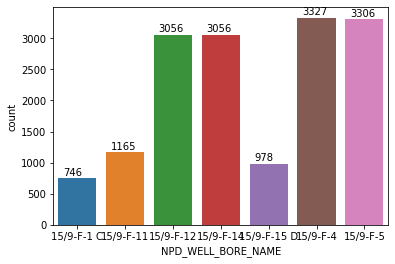

In [8]:
ax = sns.countplot(volve['NPD_WELL_BORE_NAME'])
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+50))

In [9]:
volve.groupby(['NPD_WELL_BORE_NAME']).agg({'NPD_WELL_BORE_NAME':'count'})

,NPD_WELL_BORE_NAME
NPD_WELL_BORE_NAME,
15/9-F-1 C,746
15/9-F-11,1165
15/9-F-12,3056
15/9-F-14,3056
15/9-F-15 D,978
15/9-F-4,3327
15/9-F-5,3306


### Well 1 F-12 EDA

In [10]:
well1 = volve['NPD_WELL_BORE_NAME'] == '15/9-F-12'
df_well1 = volve[well1].reset_index().drop('index',axis = 1)
print(df_well1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   3056 non-null   object 
 1   NPD_WELL_BORE_CODE        3056 non-null   int64  
 2   NPD_WELL_BORE_NAME        3056 non-null   object 
 3   ON_STREAM_HRS             3056 non-null   float64
 4   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64
 5   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64
 6   AVG_DP_TUBING             3050 non-null   float64
 7   AVG_ANNULUS_PRESS         3043 non-null   float64
 8   AVG_CHOKE_SIZE_P          3012 non-null   float64
 9   AVG_CHOKE_UOM             3056 non-null   object 
 10  AVG_WHP_P                 3056 non-null   float64
 11  AVG_WHT_P                 3056 non-null   float64
 12  DP_CHOKE_SIZE             3056 non-null   float64
 13  BORE_OIL_VOL              3056 non-null   float64
 14  BORE_GAS

Text(0.5, 1.0, 'Well Bore Name = 15/9-F-12(Well 1)')

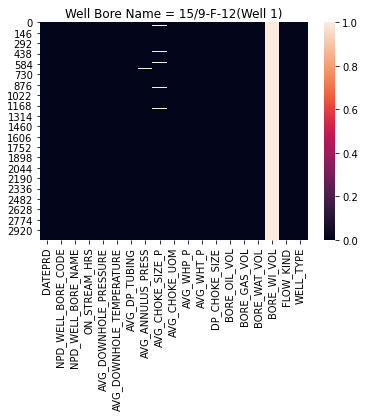

In [11]:
sns.heatmap(df_well1.isnull())
plt.title('Well Bore Name = 15/9-F-12(Well 1)')


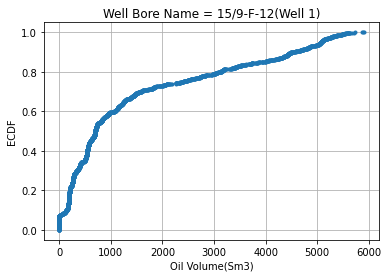

In [12]:
#Cumulative Density Function to know the data distribution
def eced(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1,n+1)/n
    return x,y
x_axis, y_axis = eced(df_well1['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Well Bore Name = 15/9-F-12(Well 1)')
plt.grid(True)

plt.show()

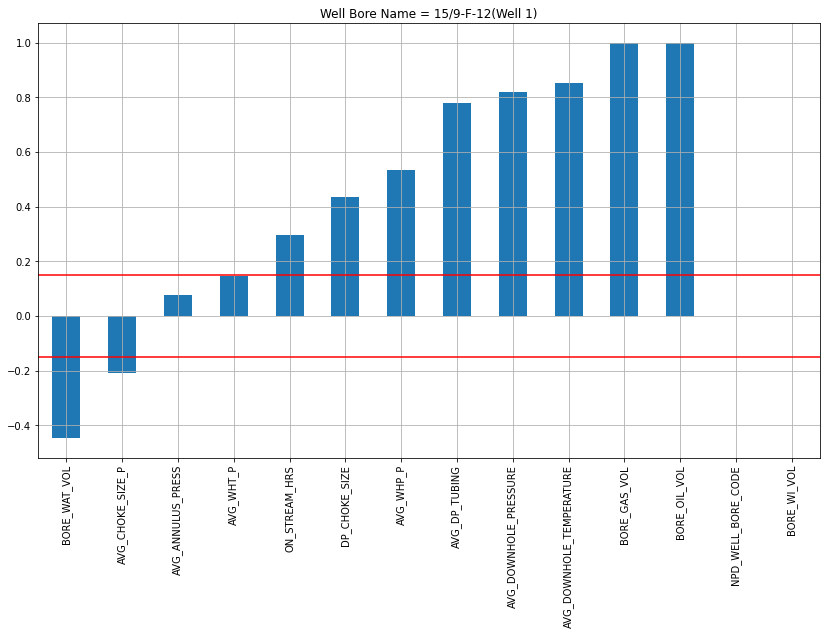

In [13]:
plt.figure(figsize=(14,8))
df_well1.corr()['BORE_OIL_VOL'].sort_values().plot(kind = 'bar')
plt.axhline(y = 0.15,color = 'red')
plt.axhline(y = -0.15,color = 'red')
plt.title('Well Bore Name = 15/9-F-12(Well 1)')
plt.grid(True)

### Well 2 F-11 EDA

In [14]:
well2 = volve['NPD_WELL_BORE_NAME'] == '15/9-F-11'
df_well2 = volve[well2].reset_index().drop('index',axis = 1)
print(df_well2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1165 entries, 0 to 1164
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   1165 non-null   object 
 1   NPD_WELL_BORE_CODE        1165 non-null   int64  
 2   NPD_WELL_BORE_NAME        1165 non-null   object 
 3   ON_STREAM_HRS             1165 non-null   float64
 4   AVG_DOWNHOLE_PRESSURE     1159 non-null   float64
 5   AVG_DOWNHOLE_TEMPERATURE  1159 non-null   float64
 6   AVG_DP_TUBING             1159 non-null   float64
 7   AVG_ANNULUS_PRESS         1159 non-null   float64
 8   AVG_CHOKE_SIZE_P          1163 non-null   float64
 9   AVG_CHOKE_UOM             1165 non-null   object 
 10  AVG_WHP_P                 1159 non-null   float64
 11  AVG_WHT_P                 1159 non-null   float64
 12  DP_CHOKE_SIZE             1159 non-null   float64
 13  BORE_OIL_VOL              1165 non-null   float64
 14  BORE_GAS

Text(0.5, 1.0, 'Well Bore Name = 15/9-F-11(Well 2)')

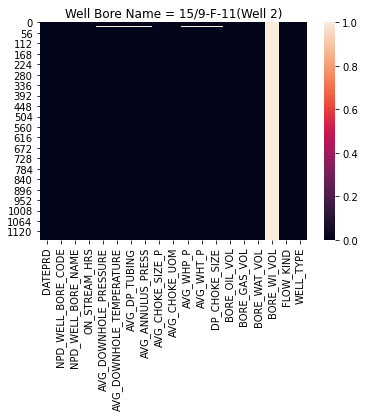

In [15]:
sns.heatmap(df_well2.isnull())
plt.title('Well Bore Name = 15/9-F-11(Well 2)')

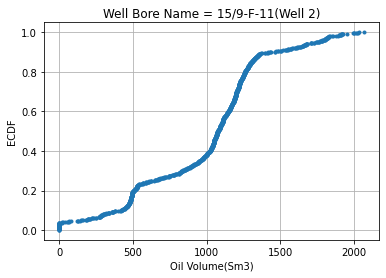

In [16]:
x_axis, y_axis = eced(df_well2['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Well Bore Name = 15/9-F-11(Well 2)')
plt.grid(True)
plt.show()

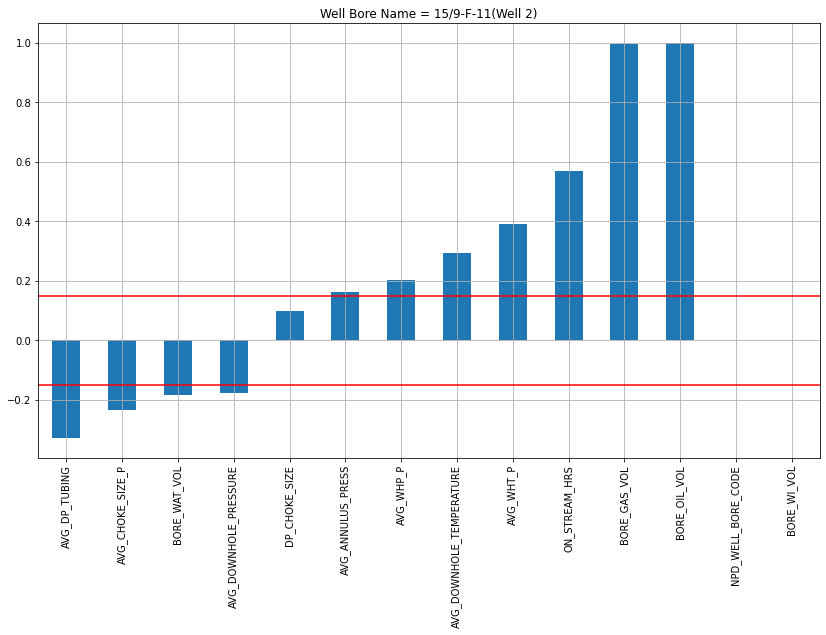

In [17]:
plt.figure(figsize=(14,8))
df_well2.corr()['BORE_OIL_VOL'].sort_values().plot(kind = 'bar')
plt.axhline(y = 0.15,color = 'red')
plt.axhline(y = -0.15,color = 'red')
plt.title('Well Bore Name = 15/9-F-11(Well 2)')
plt.grid(True)

## Well 3 F-14 EDA

In [18]:
well3 = volve['NPD_WELL_BORE_NAME'] == '15/9-F-14'
df_well3 = volve[well3].reset_index().drop('index',axis = 1)
print(df_well3.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   3056 non-null   object 
 1   NPD_WELL_BORE_CODE        3056 non-null   int64  
 2   NPD_WELL_BORE_NAME        3056 non-null   object 
 3   ON_STREAM_HRS             3056 non-null   float64
 4   AVG_DOWNHOLE_PRESSURE     3050 non-null   float64
 5   AVG_DOWNHOLE_TEMPERATURE  3050 non-null   float64
 6   AVG_DP_TUBING             3050 non-null   float64
 7   AVG_ANNULUS_PRESS         2533 non-null   float64
 8   AVG_CHOKE_SIZE_P          2860 non-null   float64
 9   AVG_CHOKE_UOM             3056 non-null   object 
 10  AVG_WHP_P                 3056 non-null   float64
 11  AVG_WHT_P                 3056 non-null   float64
 12  DP_CHOKE_SIZE             3056 non-null   float64
 13  BORE_OIL_VOL              3056 non-null   float64
 14  BORE_GAS

Text(0.5, 1.0, 'Well Bore Name = 15/9-F-14(Well 3)')

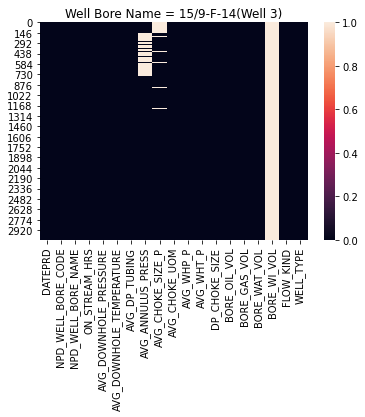

In [19]:
sns.heatmap(df_well3.isnull())
plt.title('Well Bore Name = 15/9-F-14(Well 3)')

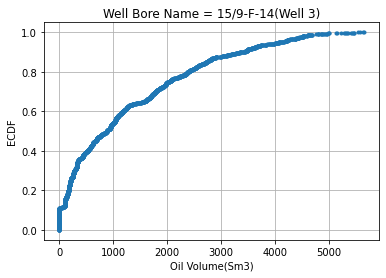

In [20]:
x_axis, y_axis = eced(df_well3['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Well Bore Name = 15/9-F-14(Well 3)')
plt.grid(True)
plt.show()

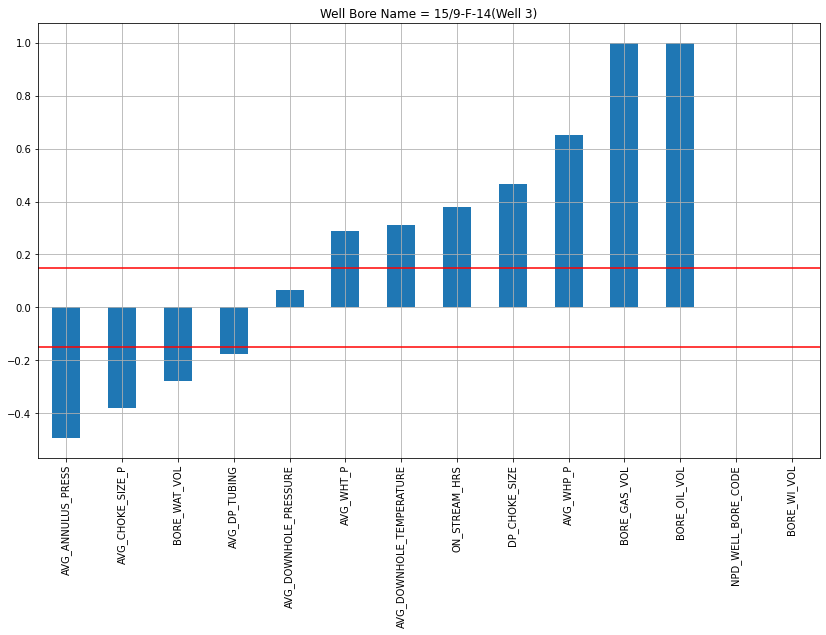

In [21]:
plt.figure(figsize=(14,8))
df_well3.corr()['BORE_OIL_VOL'].sort_values().plot(kind = 'bar')
plt.axhline(y = 0.15,color = 'red')
plt.axhline(y = -0.15,color = 'red')
plt.title('Well Bore Name = 15/9-F-14(Well 3)')
plt.grid(True)

## Well 4 F-15D EDA

In [22]:
well4 = volve['NPD_WELL_BORE_NAME'] == '15/9-F-15 D'
df_well4 = volve[well4].reset_index().drop('index',axis = 1)
print(df_well4.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978 entries, 0 to 977
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   978 non-null    object 
 1   NPD_WELL_BORE_CODE        978 non-null    int64  
 2   NPD_WELL_BORE_NAME        978 non-null    object 
 3   ON_STREAM_HRS             978 non-null    float64
 4   AVG_DOWNHOLE_PRESSURE     978 non-null    float64
 5   AVG_DOWNHOLE_TEMPERATURE  978 non-null    float64
 6   AVG_DP_TUBING             978 non-null    float64
 7   AVG_ANNULUS_PRESS         978 non-null    float64
 8   AVG_CHOKE_SIZE_P          978 non-null    float64
 9   AVG_CHOKE_UOM             978 non-null    object 
 10  AVG_WHP_P                 978 non-null    float64
 11  AVG_WHT_P                 978 non-null    float64
 12  DP_CHOKE_SIZE             978 non-null    float64
 13  BORE_OIL_VOL              978 non-null    float64
 14  BORE_GAS_V

Text(0.5, 1.0, 'Well Bore Name = 15/9-F-15 D(Well 4)')

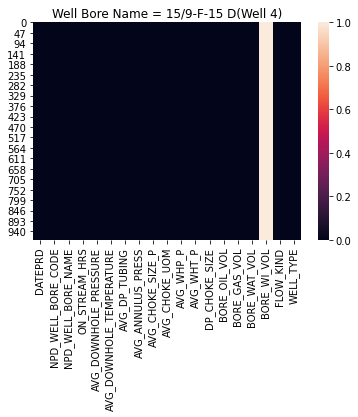

In [23]:
sns.heatmap(df_well4.isnull())
plt.title('Well Bore Name = 15/9-F-15 D(Well 4)')

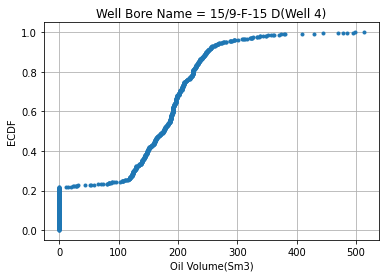

In [24]:
x_axis, y_axis = eced(df_well4['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Well Bore Name = 15/9-F-15 D(Well 4)')
plt.grid(True)
plt.show()

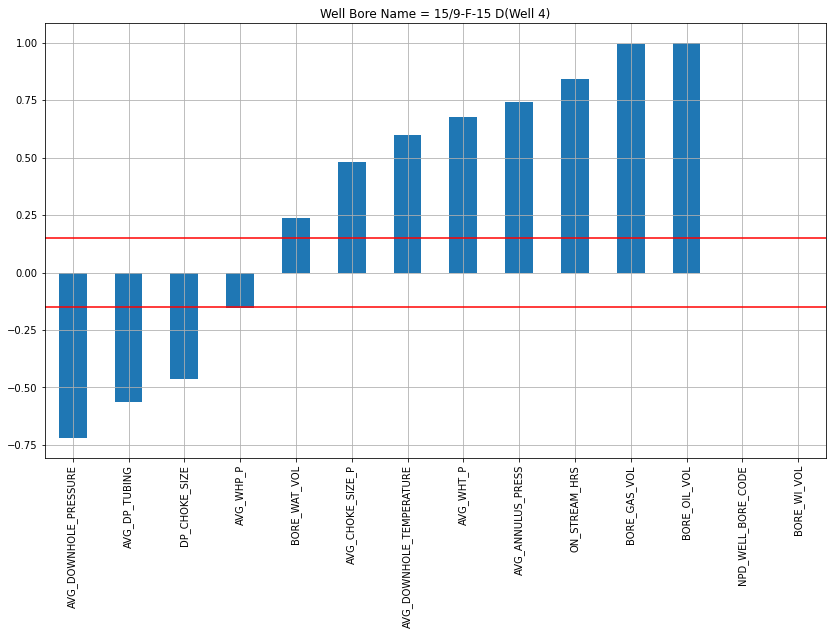

In [25]:
plt.figure(figsize=(14,8))
df_well4.corr()['BORE_OIL_VOL'].sort_values().plot(kind = 'bar')
plt.axhline(y = 0.15,color = 'red')
plt.axhline(y = -0.15,color = 'red')
plt.title('Well Bore Name = 15/9-F-15 D(Well 4)')
plt.grid(True)

## Well 5 F-1 C EDA

In [26]:
well5 = volve['NPD_WELL_BORE_NAME'] == '15/9-F-1 C'
df_well5 = volve[well5].reset_index().drop('index',axis = 1)
print(df_well5.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   746 non-null    object 
 1   NPD_WELL_BORE_CODE        746 non-null    int64  
 2   NPD_WELL_BORE_NAME        746 non-null    object 
 3   ON_STREAM_HRS             746 non-null    float64
 4   AVG_DOWNHOLE_PRESSURE     743 non-null    float64
 5   AVG_DOWNHOLE_TEMPERATURE  743 non-null    float64
 6   AVG_DP_TUBING             743 non-null    float64
 7   AVG_ANNULUS_PRESS         17 non-null     float64
 8   AVG_CHOKE_SIZE_P          746 non-null    float64
 9   AVG_CHOKE_UOM             746 non-null    object 
 10  AVG_WHP_P                 746 non-null    float64
 11  AVG_WHT_P                 746 non-null    float64
 12  DP_CHOKE_SIZE             746 non-null    float64
 13  BORE_OIL_VOL              746 non-null    float64
 14  BORE_GAS_V

Text(0.5, 1.0, 'Well Bore Name = 15/9-F-1 C')

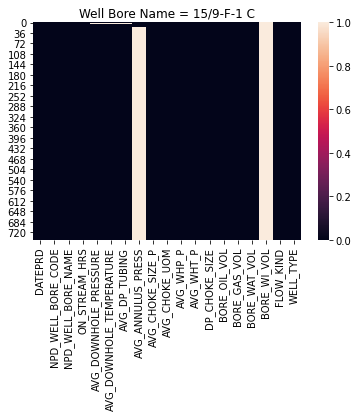

In [27]:
sns.heatmap(df_well5.isnull())
plt.title('Well Bore Name = 15/9-F-1 C')

Text(0.5, 1.0, 'Well Bore Name = 15/9-F-1 C')

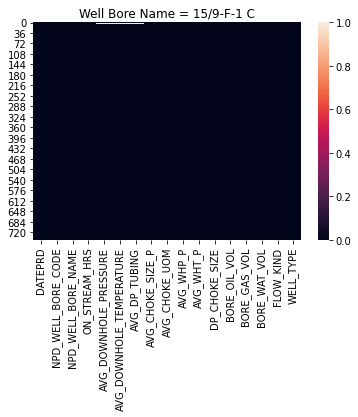

In [28]:
sns.heatmap(df_well5.drop(['AVG_ANNULUS_PRESS','BORE_WI_VOL'], axis = 1).isnull())
plt.title('Well Bore Name = 15/9-F-1 C')

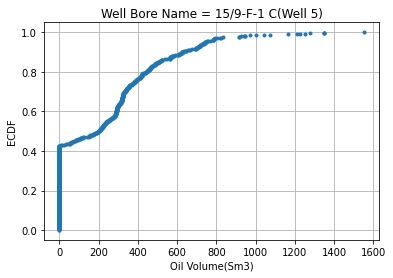

In [29]:
x_axis, y_axis = eced(df_well5['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Well Bore Name = 15/9-F-1 C(Well 5)')
plt.grid(True)
plt.show()

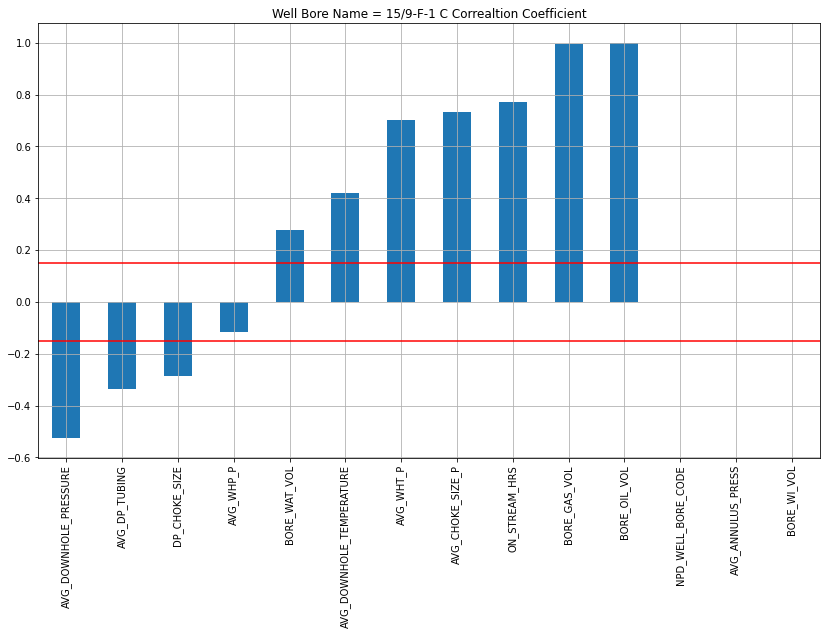

In [30]:
plt.figure(figsize=(14,8))
df_well5.corr()['BORE_OIL_VOL'].sort_values().plot(kind = 'bar')
plt.axhline(y = 0.15,color = 'red')
plt.axhline(y = -0.15,color = 'red')
plt.title('Well Bore Name = 15/9-F-1 C Correaltion Coefficient')
plt.grid(True)

array([<AxesSubplot:xlabel='DATEPRD'>, <AxesSubplot:xlabel='DATEPRD'>,
       <AxesSubplot:xlabel='DATEPRD'>, <AxesSubplot:xlabel='DATEPRD'>,
       <AxesSubplot:xlabel='DATEPRD'>, <AxesSubplot:xlabel='DATEPRD'>,
       <AxesSubplot:xlabel='DATEPRD'>, <AxesSubplot:xlabel='DATEPRD'>,
       <AxesSubplot:xlabel='DATEPRD'>, <AxesSubplot:xlabel='DATEPRD'>,
       <AxesSubplot:xlabel='DATEPRD'>, <AxesSubplot:xlabel='DATEPRD'>,
       <AxesSubplot:xlabel='DATEPRD'>, <AxesSubplot:xlabel='DATEPRD'>],
      dtype=object)

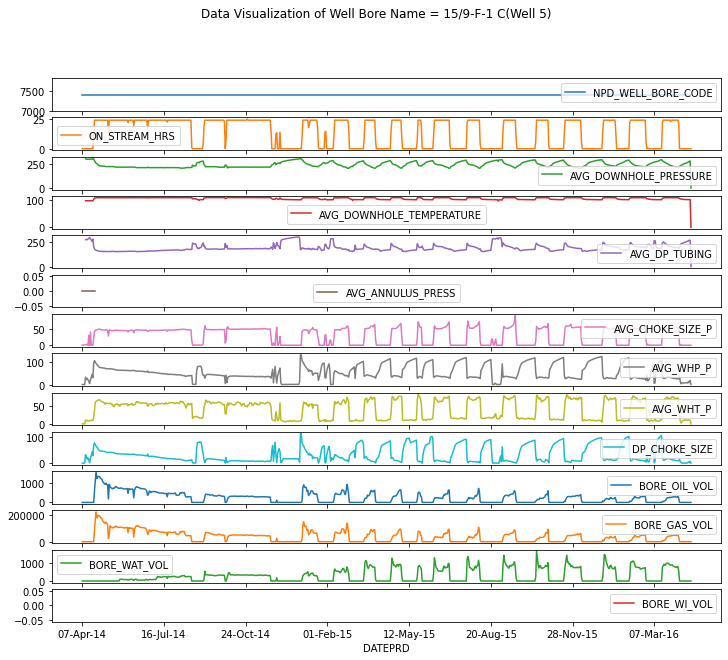

In [31]:
df_well5.index = df_well5['DATEPRD']
#plt.title('Data Visualization of Well Bore Name = 15/9-F-1 C(Well 5')
df_well5.plot(figsize = (12,10),subplots = True, title = 'Data Visualization of Well Bore Name = 15/9-F-1 C(Well 5)' )

## Well 6 F-4 EDA

In [32]:
well6 = volve['NPD_WELL_BORE_NAME'] == '15/9-F-4'
df_well6 = volve[well6].reset_index().drop('index',axis = 1)
print(df_well6.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3327 entries, 0 to 3326
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   3327 non-null   object 
 1   NPD_WELL_BORE_CODE        3327 non-null   int64  
 2   NPD_WELL_BORE_NAME        3327 non-null   object 
 3   ON_STREAM_HRS             3175 non-null   float64
 4   AVG_DOWNHOLE_PRESSURE     0 non-null      float64
 5   AVG_DOWNHOLE_TEMPERATURE  0 non-null      float64
 6   AVG_DP_TUBING             0 non-null      float64
 7   AVG_ANNULUS_PRESS         0 non-null      float64
 8   AVG_CHOKE_SIZE_P          0 non-null      float64
 9   AVG_CHOKE_UOM             0 non-null      object 
 10  AVG_WHP_P                 0 non-null      float64
 11  AVG_WHT_P                 0 non-null      float64
 12  DP_CHOKE_SIZE             3173 non-null   float64
 13  BORE_OIL_VOL              0 non-null      float64
 14  BORE_GAS

Text(0.5, 1.0, 'Well Bore Name = 15/9-F-4(Well 6)')

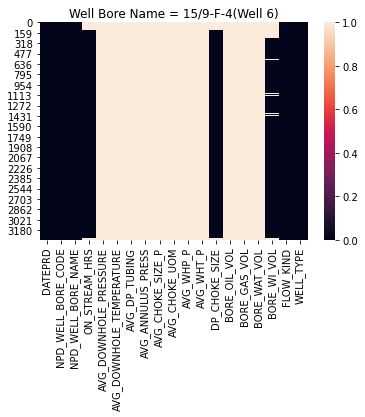

In [33]:
sns.heatmap(df_well6.isnull())
plt.title('Well Bore Name = 15/9-F-4(Well 6)')

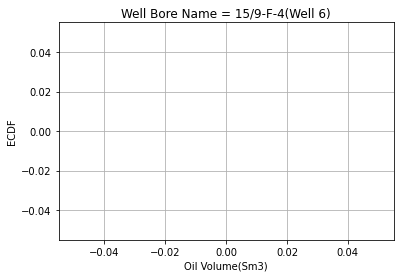

In [34]:
x_axis, y_axis = eced(df_well6['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Well Bore Name = 15/9-F-4(Well 6)')
plt.grid(True)
plt.show()

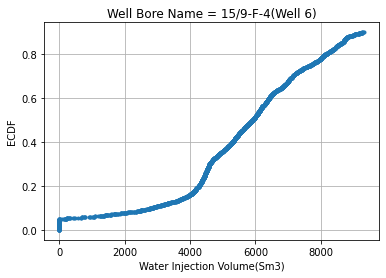

In [35]:
x_axis, y_axis = eced(df_well6['BORE_WI_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Water Injection Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Well Bore Name = 15/9-F-4(Well 6)')
plt.grid(True)
plt.show()

## Well 7 F-5 EDA

In [36]:
well7 = volve['NPD_WELL_BORE_NAME'] == '15/9-F-5'
df_well7 = volve[well7].reset_index().drop('index',axis = 1)
print(df_well7.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3306 entries, 0 to 3305
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   3306 non-null   object 
 1   NPD_WELL_BORE_CODE        3306 non-null   int64  
 2   NPD_WELL_BORE_NAME        3306 non-null   object 
 3   ON_STREAM_HRS             3173 non-null   float64
 4   AVG_DOWNHOLE_PRESSURE     0 non-null      float64
 5   AVG_DOWNHOLE_TEMPERATURE  0 non-null      float64
 6   AVG_DP_TUBING             0 non-null      float64
 7   AVG_ANNULUS_PRESS         160 non-null    float64
 8   AVG_CHOKE_SIZE_P          160 non-null    float64
 9   AVG_CHOKE_UOM             160 non-null    object 
 10  AVG_WHP_P                 160 non-null    float64
 11  AVG_WHT_P                 151 non-null    float64
 12  DP_CHOKE_SIZE             3172 non-null   float64
 13  BORE_OIL_VOL              160 non-null    float64
 14  BORE_GAS

Text(0.5, 1.0, 'Well Bore Name = 15/9-F-5(Well 7)')

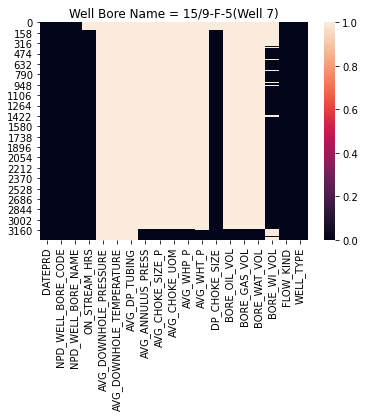

In [37]:
sns.heatmap(df_well7.isnull())
plt.title('Well Bore Name = 15/9-F-5(Well 7)')

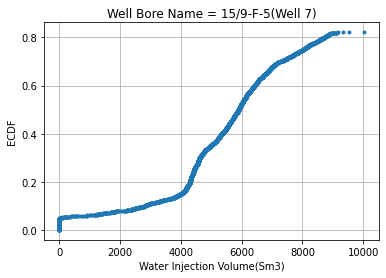

In [38]:
x_axis, y_axis = eced(df_well7['BORE_WI_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Water Injection Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Well Bore Name = 15/9-F-5(Well 7)')
plt.grid(True)
plt.show()

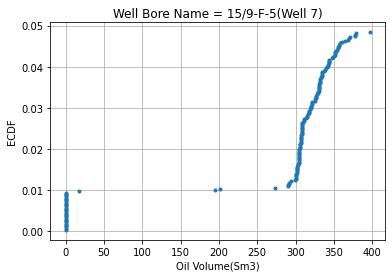

In [39]:
x_axis, y_axis = eced(df_well7['BORE_OIL_VOL'])
plt.plot(x_axis, y_axis, marker=".", linestyle="none")

#Labeling
plt.xlabel('Oil Volume(Sm3)')
plt.ylabel('ECDF')
plt.title('Well Bore Name = 15/9-F-5(Well 7)')
plt.grid(True)
plt.show()

C:\Users\acer\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='FLOW_KIND', ylabel='count'>

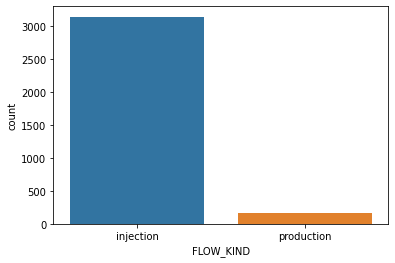

In [40]:
sns.countplot(df_well7['FLOW_KIND'])

In [41]:
df_well7['FLOW_KIND'].value_counts()

injection     3146
production     160
Name: FLOW_KIND, dtype: int64

In [42]:
inj = df_well7['FLOW_KIND'] =='injection'
df_well7i = df_well7[inj].reset_index().drop('index',axis = 1)
df_well7i.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3146 entries, 0 to 3145
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   DATEPRD                   3146 non-null   object 
 1   NPD_WELL_BORE_CODE        3146 non-null   int64  
 2   NPD_WELL_BORE_NAME        3146 non-null   object 
 3   ON_STREAM_HRS             3013 non-null   float64
 4   AVG_DOWNHOLE_PRESSURE     0 non-null      float64
 5   AVG_DOWNHOLE_TEMPERATURE  0 non-null      float64
 6   AVG_DP_TUBING             0 non-null      float64
 7   AVG_ANNULUS_PRESS         0 non-null      float64
 8   AVG_CHOKE_SIZE_P          0 non-null      float64
 9   AVG_CHOKE_UOM             0 non-null      object 
 10  AVG_WHP_P                 0 non-null      float64
 11  AVG_WHT_P                 0 non-null      float64
 12  DP_CHOKE_SIZE             3012 non-null   float64
 13  BORE_OIL_VOL              0 non-null      float64
 14  BORE_GAS

Text(0.5, 1, 'Well Bore Name = 15/9-F-5(Well 7 injection)')

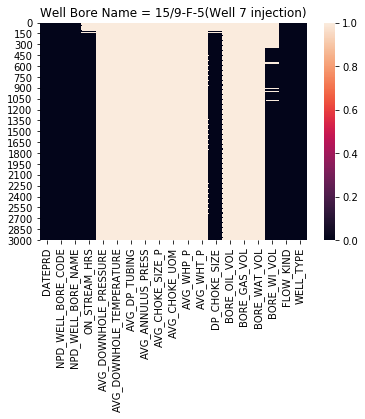

In [43]:
sns.heatmap(df_well7i.isnull())
plt.title('Well Bore Name = 15/9-F-5(Well 7 injection)')

In [44]:
prd = df_well7['FLOW_KIND'] =='production'
df_well7p = df_well7[prd].reset_index().drop('index',axis = 1)
df_well7p.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 19 columns):
DATEPRD                     160 non-null object
NPD_WELL_BORE_CODE          160 non-null int64
NPD_WELL_BORE_NAME          160 non-null object
ON_STREAM_HRS               160 non-null float64
AVG_DOWNHOLE_PRESSURE       0 non-null float64
AVG_DOWNHOLE_TEMPERATURE    0 non-null float64
AVG_DP_TUBING               0 non-null float64
AVG_ANNULUS_PRESS           160 non-null float64
AVG_CHOKE_SIZE_P            160 non-null float64
AVG_CHOKE_UOM               160 non-null object
AVG_WHP_P                   160 non-null float64
AVG_WHT_P                   151 non-null float64
DP_CHOKE_SIZE               160 non-null float64
BORE_OIL_VOL                160 non-null float64
BORE_GAS_VOL                160 non-null float64
BORE_WAT_VOL                160 non-null float64
BORE_WI_VOL                 15 non-null float64
FLOW_KIND                   160 non-null object
WELL_TYPE                 

Text(0.5, 1, 'Well Bore Name = 15/9-F-5(Well 7 injection)')

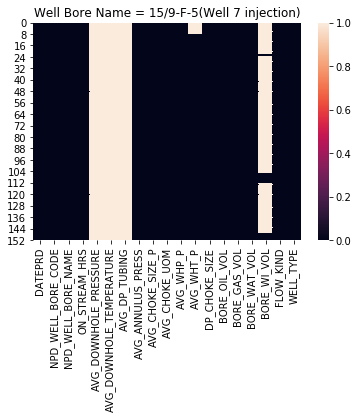

In [45]:
sns.heatmap(df_well7p.isnull())
plt.title('Well Bore Name = 15/9-F-5(Well 7 injection)')

# Data Preparation

### Injection Data Preparation

#### Well 7 injection F-5

In [46]:
#df_well7i.to_csv('Well7inject.csv')

In [47]:
df_well7i = pd.read_csv('Well7inject.csv')

Text(0.5, 1, 'Well Bore Name = 15/9-F-5(Well 7 injection)')

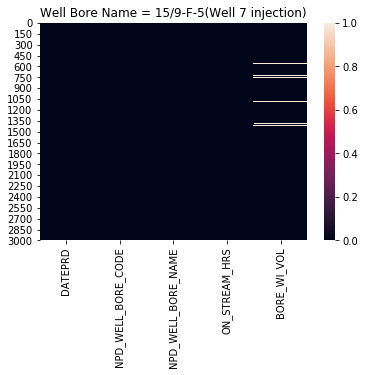

In [48]:
sns.heatmap(df_well7i.isnull())
plt.title('Well Bore Name = 15/9-F-5(Well 7 injection)')

In [49]:
df_well7i = df_well7i.fillna(0)

Text(0.5, 1, 'Well Bore Name = 15/9-F-5(Well 7 injection)')

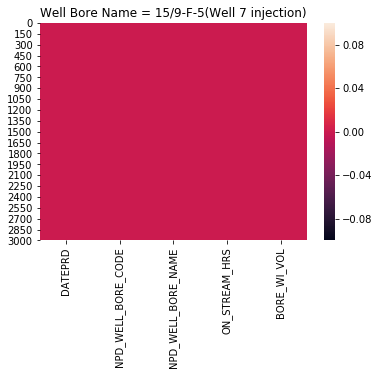

In [50]:
sns.heatmap(df_well7i.isnull())
plt.title('Well Bore Name = 15/9-F-5(Well 7 injection)')

In [51]:
#df_well7i.to_csv('Well7injectfinalfilled.csv')

#### Well 6 F-4

In [52]:
#df_well6.to_csv('Well6inject.csv')

In [53]:
df_well6 = pd.read_csv('Well6inject.csv')

Text(0.5, 1, 'Well Bore Name = 15/9-F-4(Well 6)')

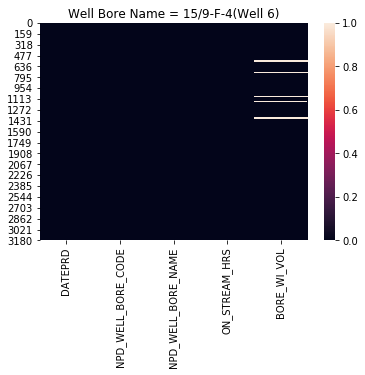

In [54]:
sns.heatmap(df_well6.isnull())
plt.title('Well Bore Name = 15/9-F-4(Well 6)')

In [55]:
df_well6 = df_well6.fillna(0)

Text(0.5, 1, 'Well Bore Name = 15/9-F-4(Well 6)')

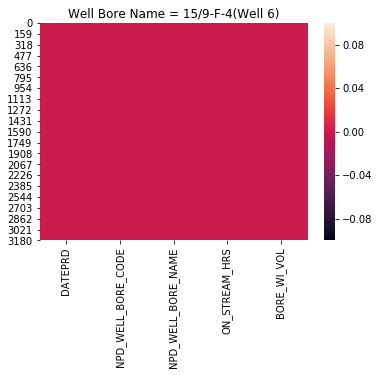

In [56]:
sns.heatmap(df_well6.isnull())
plt.title('Well Bore Name = 15/9-F-4(Well 6)')

In [57]:
#df_well6.to_csv('Well6injectfinalfilled.csv')

### Combining total Water injection Data

In [58]:
df_well6 = pd.read_csv('Well6injectfinalfilled.csv')
df_well7 = pd.read_csv('Well7injectfinalfilled.csv')

In [59]:
right = df_well6.merge(df_well7,how = 'right', on = 'DATEPRD')
left = df_well6.merge(df_well7,how = 'left', on = 'DATEPRD')
inner = df_well6.merge(df_well7,how = 'inner', on = 'DATEPRD')
outer =df_well6.merge(df_well7,how = 'outer', on = 'DATEPRD')

In [60]:
#right.to_csv('right.csv')
#left.to_csv('left.csv')
#inner.to_csv('inner.csv')
#outer.to_csv('outer.csv')

In [61]:
injection = pd.read_csv('Total Injection Data.csv')

In [62]:
injection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3327 entries, 0 to 3326
Data columns (total 6 columns):
DATEPRD                  3327 non-null object
Injection Hours F-4      3327 non-null float64
Water Injection F-4      3327 non-null int64
Injection Hours F-5      3327 non-null float64
Water Injection F-5      3327 non-null int64
Total Water Injection    3327 non-null int64
dtypes: float64(2), int64(3), object(1)
memory usage: 156.1+ KB


In [63]:
plt.figure(figsize = (24,15))
plt.plot(injection['DATEPRD'],injection['Total Water Injection'])

Error in callback <function flush_figures at 0x000001A3ACCEE318> (for post_execute):


KeyboardInterrupt: 

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A3C6E959C8>,
      dtype=object)

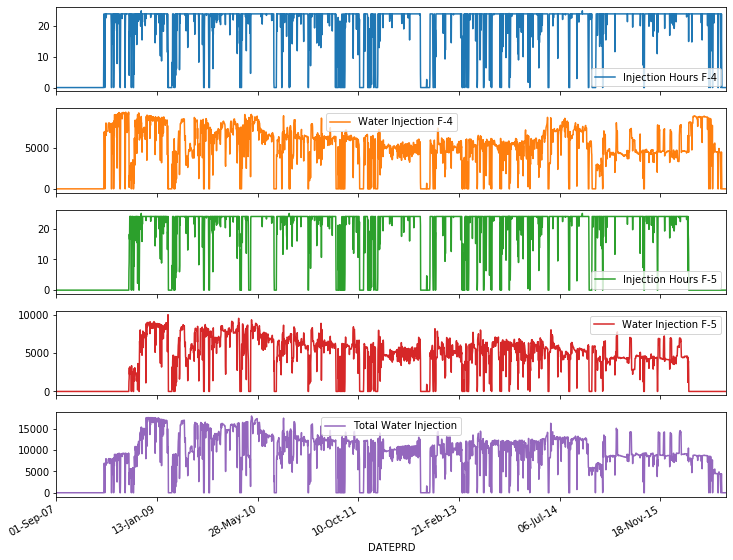

In [64]:
injection.index= injection['DATEPRD']
injection.plot(figsize = (12,10),subplots = True)

## Producer F-12(Well 1) handling missing values and Merging with Water Injection Data 

In [65]:
df_well1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3056 entries, 0 to 3055
Data columns (total 19 columns):
DATEPRD                     3056 non-null object
NPD_WELL_BORE_CODE          3056 non-null int64
NPD_WELL_BORE_NAME          3056 non-null object
ON_STREAM_HRS               3056 non-null float64
AVG_DOWNHOLE_PRESSURE       3050 non-null float64
AVG_DOWNHOLE_TEMPERATURE    3050 non-null float64
AVG_DP_TUBING               3050 non-null float64
AVG_ANNULUS_PRESS           3043 non-null float64
AVG_CHOKE_SIZE_P            3012 non-null float64
AVG_CHOKE_UOM               3056 non-null object
AVG_WHP_P                   3056 non-null float64
AVG_WHT_P                   3056 non-null float64
DP_CHOKE_SIZE               3056 non-null float64
BORE_OIL_VOL                3056 non-null float64
BORE_GAS_VOL                3056 non-null float64
BORE_WAT_VOL                3056 non-null float64
BORE_WI_VOL                 0 non-null float64
FLOW_KIND                   3056 non-null object
WE

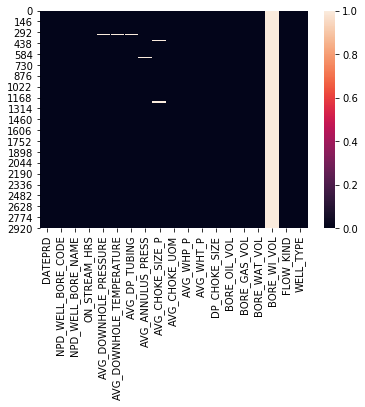

In [66]:
sns.heatmap(df_well1.isnull())

In [67]:
#df_well1.to_csv('Well1F12.csv')

In [68]:
df_well1 = pd.read_csv('Well1F12.csv')

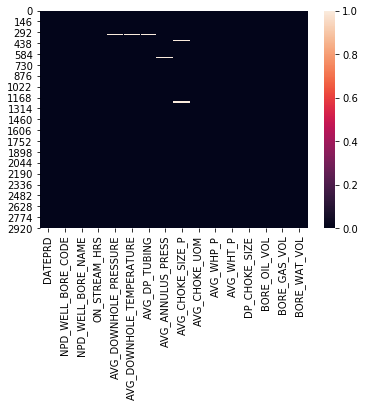

In [69]:
sns.heatmap(df_well1.isnull())

In [70]:
df_well1['AVG_CHOKE_SIZE_P'] = df_well1['AVG_CHOKE_SIZE_P'].fillna(0)

In [71]:
df_well1 = df_well1.interpolate(method ='linear', limit_direction ='forward') 

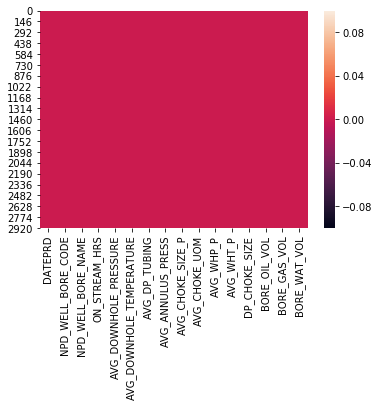

In [72]:
sns.heatmap(df_well1.isnull())

In [73]:
#df_well1.to_csv('Well1F12finalfilled.csv')

### Merging

In [74]:
#outer =injection.merge(df_well1,how = 'outer', on = 'DATEPRD')

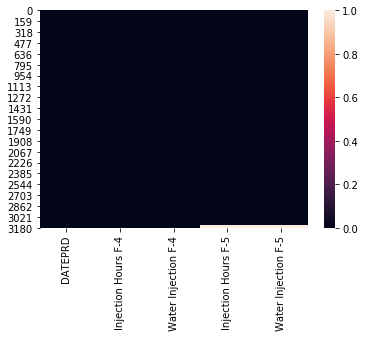

In [75]:
sns.heatmap(outer.isnull())

In [76]:
#right.to_csv('right.csv')
#left.to_csv('left.csv')
#inner.to_csv('inner.csv')
#outer.to_csv('outer.csv')

In [77]:
df = pd.read_csv("F12 and Injection.csv")

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3305 entries, 0 to 3304
Data columns (total 20 columns):
DATEPRD                     3305 non-null object
NPD_WELL_BORE_CODE          3273 non-null float64
NPD_WELL_BORE_NAME          3273 non-null object
ON_STREAM_HRS               3220 non-null float64
AVG_DOWNHOLE_PRESSURE       3220 non-null float64
AVG_DOWNHOLE_TEMPERATURE    3220 non-null float64
AVG_DP_TUBING               3220 non-null float64
AVG_ANNULUS_PRESS           3220 non-null float64
AVG_CHOKE_SIZE_P            3220 non-null float64
AVG_WHP_P                   3220 non-null float64
AVG_WHT_P                   3220 non-null float64
DP_CHOKE_SIZE               3220 non-null float64
BORE_OIL_VOL                3220 non-null float64
BORE_GAS_VOL                3220 non-null float64
BORE_WAT_VOL                3220 non-null float64
Injection Hours F-4         3305 non-null float64
Water Injection F-4         3305 non-null int64
Injection Hours F-5         3305 non-null float

In [79]:
df.head()

,DATEPRD,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL,Injection Hours F-4,Water Injection F-4,Injection Hours F-5,Water Injection F-5,Total Water Injection
0,01-Sep-07,5599.0,15/9-F-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0
1,02-Sep-07,5599.0,15/9-F-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0
2,03-Sep-07,5599.0,15/9-F-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0
3,04-Sep-07,5599.0,15/9-F-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0
4,05-Sep-07,5599.0,15/9-F-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0


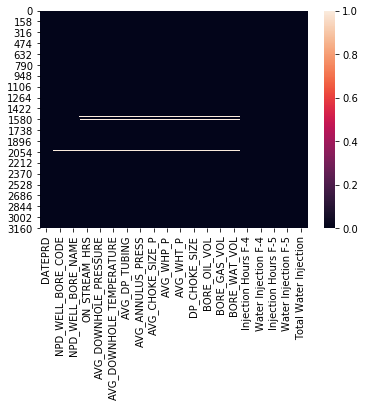

In [80]:
sns.heatmap(df.isnull())

In [81]:
df['NPD_WELL_BORE_CODE'] = '5599'
df['NPD_WELL_BORE_NAME'] = '15/9-F-12'

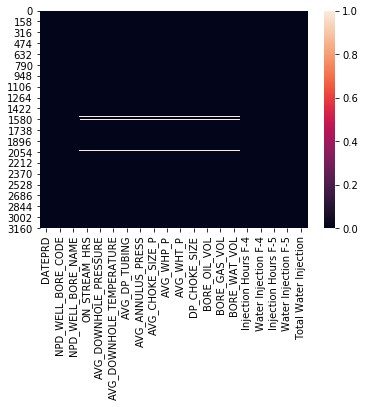

In [82]:
sns.heatmap(df.isnull())

In [83]:
df = df.interpolate(method ='linear', limit_direction ='forward') 

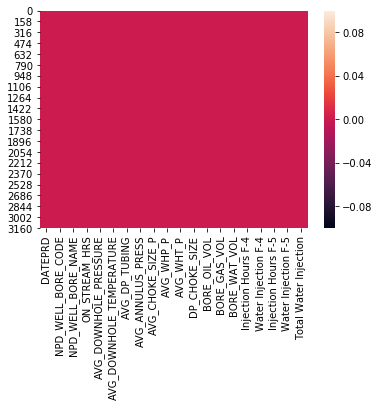

In [84]:
sns.heatmap(df.isnull())

In [85]:
#df.to_csv('Final PF-12 and Injection.csv')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A3CA897388>,
      dtype=object)

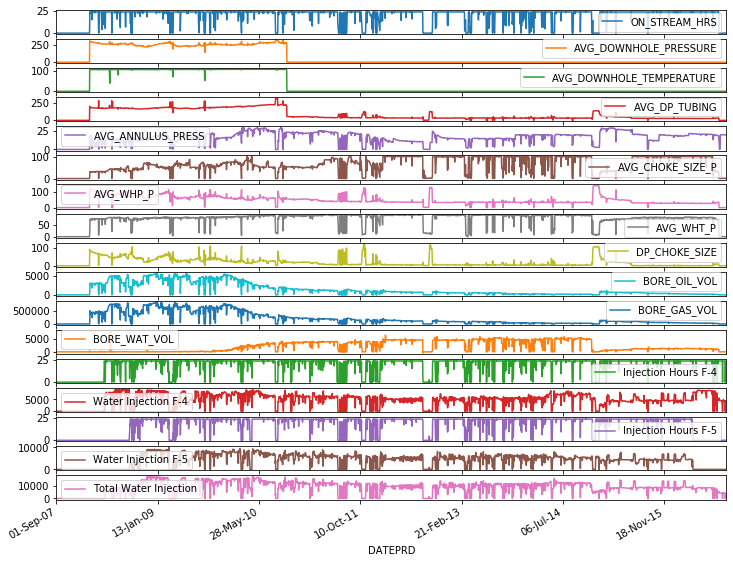

In [86]:
df.index = df['DATEPRD']
df.plot(figsize = (12,10),subplots = True)

### Feature Engineering

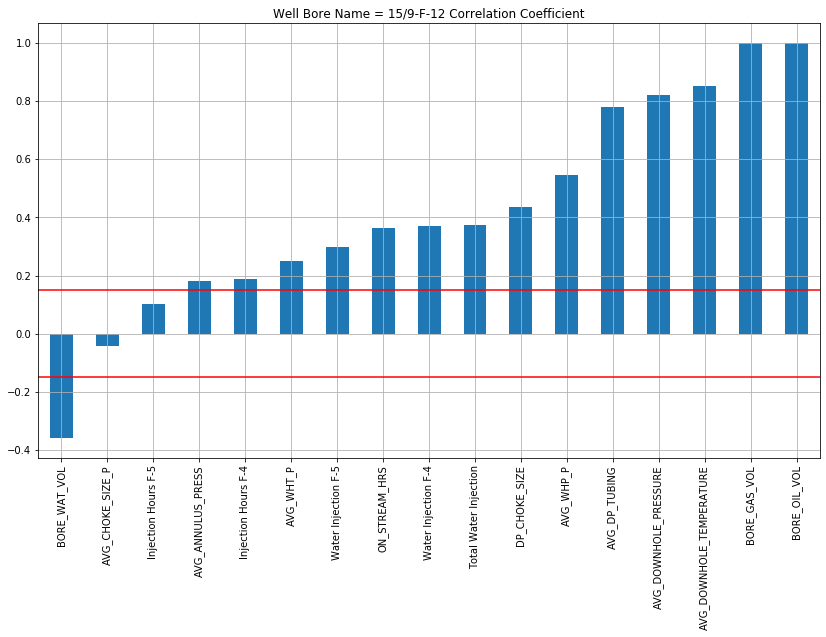

In [87]:
plt.figure(figsize=(14,8))
df.corr()['BORE_OIL_VOL'].sort_values().plot(kind = 'bar')
plt.axhline(y = 0.15,color = 'red')
plt.axhline(y = -0.15,color = 'red')
plt.title('Well Bore Name = 15/9-F-12 Correlation Coefficient')
plt.grid(True)

In [88]:
df = pd.read_csv('Final PF-12 and Injection.csv',index_col=0,parse_dates=True)

df.head(2)

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,Injection Hours F-4,Water Injection F-4,Injection Hours F-5,Water Injection F-5,Total Water Injection,BORE_OIL_VOL
DATEPRD,,,,,,,,,,,,,,,,,,,
2007-09-01,5599,15/9-F-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
2007-09-02,5599,15/9-F-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0


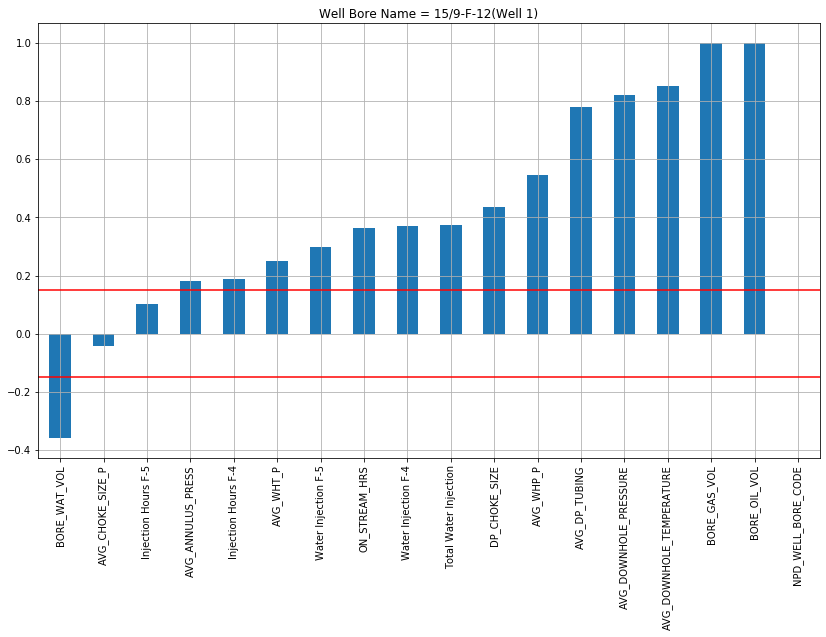

In [89]:
plt.figure(figsize=(14,8))
df.corr()['BORE_OIL_VOL'].sort_values().plot(kind = 'bar')
plt.axhline(y = 0.15,color = 'red')
plt.axhline(y = -0.15,color = 'red')
plt.title('Well Bore Name = 15/9-F-12(Well 1)')
plt.grid(True)

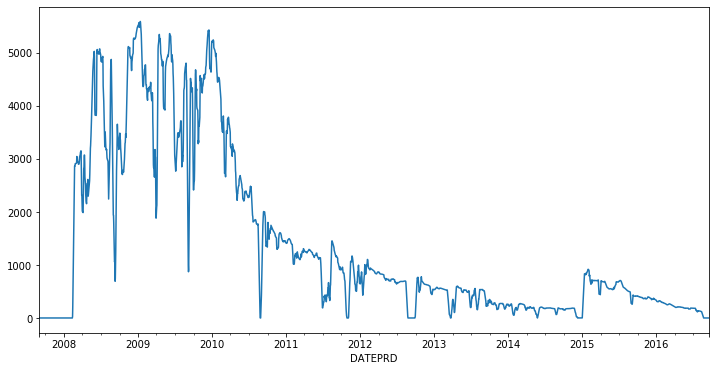

In [90]:
plt.figure(figsize = (24,15))
# plt.plot(df['DATEPRD'],df['BORE_OIL_VOL'])
df['BORE_OIL_VOL'].rolling('10D').mean().plot(figsize=(12,6))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A3CB402F08>,
      dtype=object)

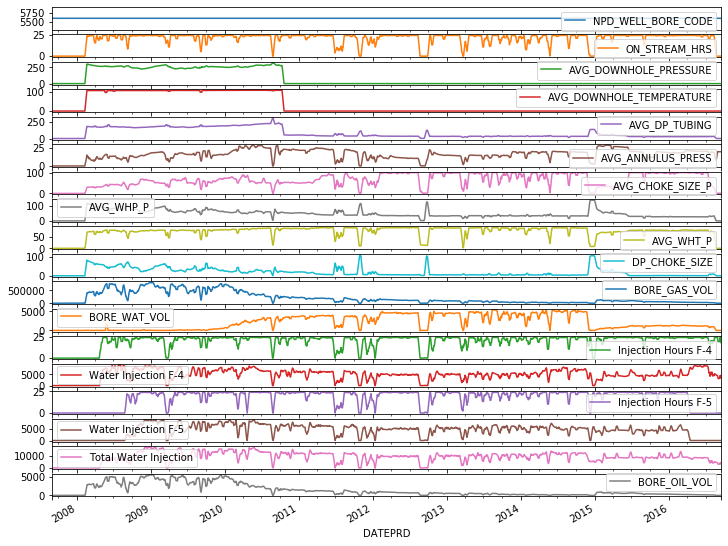

In [91]:
df.rolling('10D').mean().plot(figsize = (12,10),subplots = True)

In [92]:
df.columns

Index(['NPD_WELL_BORE_CODE', 'NPD_WELL_BORE_NAME', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P', 'AVG_WHP_P', 'AVG_WHT_P',
       'DP_CHOKE_SIZE', 'BORE_GAS_VOL', 'BORE_WAT_VOL', 'Injection Hours F-4',
       'Water Injection F-4', 'Injection Hours F-5', 'Water Injection F-5',
       'Total Water Injection', 'BORE_OIL_VOL'],
      dtype='object')

In [93]:
to_drop =["BORE_GAS_VOL",'AVG_DOWNHOLE_PRESSURE',
          'AVG_DOWNHOLE_TEMPERATURE','NPD_WELL_BORE_CODE',
          'NPD_WELL_BORE_NAME','Water Injection F-4', 
          'Injection Hours F-5','AVG_CHOKE_SIZE_P','Injection Hours F-4','Water Injection F-5',
          'BORE_OIL_VOL','BORE_WAT_VOL']


In [94]:
X = df.drop(to_drop,axis = 1)
y = df['BORE_OIL_VOL']

In [95]:
X.columns

Index(['ON_STREAM_HRS', 'AVG_DP_TUBING', 'AVG_ANNULUS_PRESS', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'Total Water Injection'],
      dtype='object')

In [96]:
X

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,Total Water Injection
DATEPRD,,,,,,,
2007-09-01,0.0,0.0,0.000,0.0,0.0,0.000,0
2007-09-02,0.0,0.0,0.000,0.0,0.0,0.000,0
2007-09-03,0.0,0.0,0.000,0.0,0.0,0.000,0
2007-09-04,0.0,0.0,0.000,0.0,0.0,0.000,0
2007-09-05,0.0,0.0,0.000,0.0,0.0,0.000,0
...,...,...,...,...,...,...,...
2016-09-13,0.0,0.0,19.959,0.0,0.0,0.013,0
2016-09-14,0.0,0.0,19.959,0.0,0.0,0.016,1811
2016-09-15,0.0,0.0,19.959,0.0,0.0,0.024,4469


In [97]:
import sklearn
print(sklearn.__version__)

0.21.3


In [98]:
#X_train = X.iloc[0:3000,:]

In [99]:
#X_test = X.iloc[3000:3306,:]

In [100]:
#y_train = Y.iloc[0:3000]
#y_test = Y.iloc[3000:3306]

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3,shuffle=True)


In [102]:
X_test = X_test.sort_index()
y_test = y_test.sort_index()

In [103]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [104]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [105]:
regression.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [106]:
y_pred = regression.predict(X_test_scaled)


In [107]:
print("The R2 value for linear regression for oil volume production is", regression.score(X_test_scaled, y_test))

The R2 value for linear regression for oil volume production is 0.6980989066415947


In [108]:
importance = regression.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 781.76244
Feature: 1, Score: 1202.21606
Feature: 2, Score: -320.53627
Feature: 3, Score: 679.04970
Feature: 4, Score: -568.47483
Feature: 5, Score: -727.54383
Feature: 6, Score: 207.90533


In [109]:
print(list(zip(regression.coef_, X.columns)))

[(781.7624431414748, 'ON_STREAM_HRS'), (1202.2160595087157, 'AVG_DP_TUBING'), (-320.5362704148469, 'AVG_ANNULUS_PRESS'), (679.0496968807539, 'AVG_WHP_P'), (-568.4748325417429, 'AVG_WHT_P'), (-727.5438275457977, 'DP_CHOKE_SIZE'), (207.9053347816759, 'Total Water Injection')]


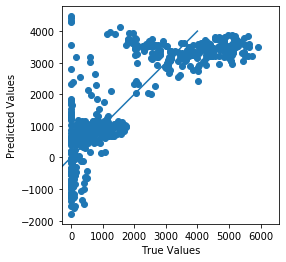

In [110]:
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,4000],[-400,4000])

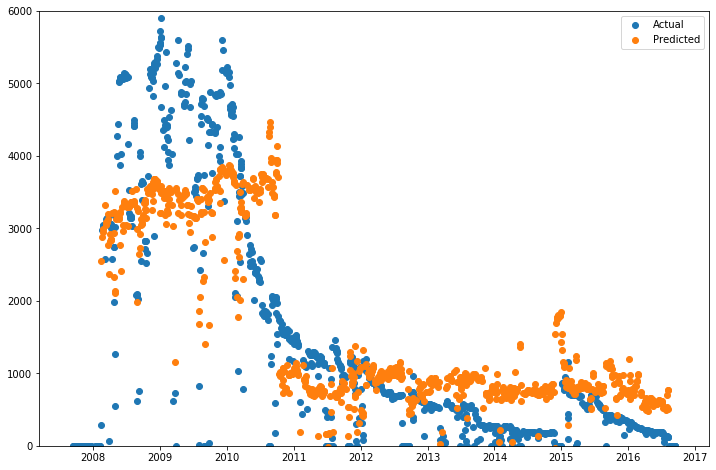

In [111]:
plt.figure(figsize=(12,8))
#plt.plot(df_train.index,train_labels)
plt.scatter(X_test.index,y_test,label= 'Actual')
plt.scatter(X_test.index,y_pred,label = 'Predicted')
plt.ylim(0,6000)
plt.legend()

#### Polynomial

In [112]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 3)
X_poly = poly_reg.fit_transform(X_train_scaled)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y_train)
x_pol_test = poly_reg.transform(X_test_scaled)


In [113]:
print("The R2 value for Polynomial regression for oil volume production is",lin_reg.score(x_pol_test, y_test))

The R2 value for Polynomial regression for oil volume production is 0.9490019765429083


In [114]:
y_pol_pred = lin_reg.predict(x_pol_test)

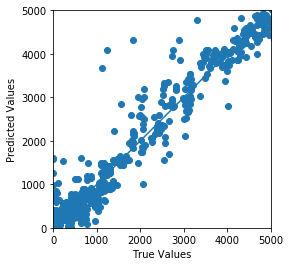

In [115]:
plt.scatter(y_test, y_pol_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.axis('square')
plt.ylim(0,5000)
plt.xlim(0,5000)
_ = plt.plot([-400,4000],[-400,4000])

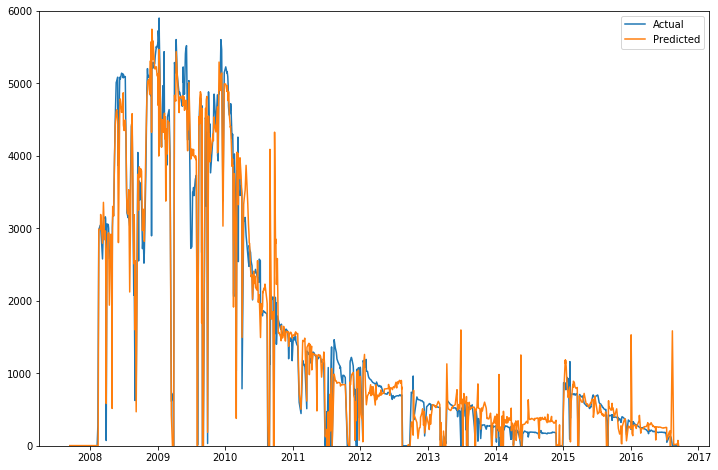

In [116]:
plt.figure(figsize=(12,8))
#plt.plot(df_train.index,train_labels)
plt.plot(X_test.index,y_test,label= 'Actual')
plt.plot(X_test.index,y_pol_pred,label = 'Predicted')
plt.ylim(0,6000)
plt.legend()

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [118]:
rf = RandomForestRegressor(n_estimators=100)
gb = GradientBoostingRegressor(n_estimators=100)

In [119]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [120]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [121]:
rf.score(X_test,y_test)

0.9866378782008907

In [122]:
gb.score(X_test,y_test)

0.9774260900255913

In [123]:
y_predict_RF = rf.predict(X_test)
y_predict_GB = gb.predict(X_test)

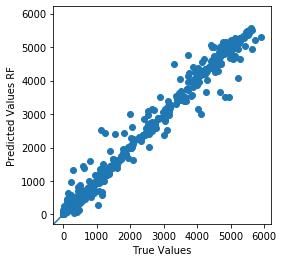

In [124]:
plt.scatter(y_test, y_predict_RF)
plt.xlabel('True Values')
plt.ylabel('Predicted Values RF')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,4000],[-400,4000])

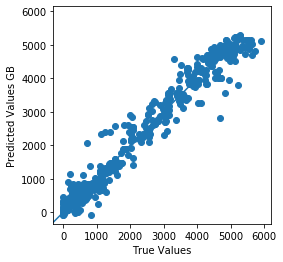

In [148]:
plt.scatter(y_test, y_predict_GB)
plt.xlabel('True Values')
plt.ylabel('Predicted Values GB')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([-400,4000],[-400,4000])

In [126]:
from sklearn import metrics 

MAE =metrics.mean_absolute_error(y_test,y_predict_RF) 
MSE = metrics.mean_squared_error(y_test,y_predict_RF)
print(MSE,MAE)

37356.07574399218 84.94492540329797


In [149]:
from sklearn import metrics 

MAE =metrics.mean_absolute_error(y_test,y_predict_GB) 
MSE = metrics.mean_squared_error(y_test,y_predict_GB)
print(MSE,MAE)

63109.19055522099 149.89470133163064


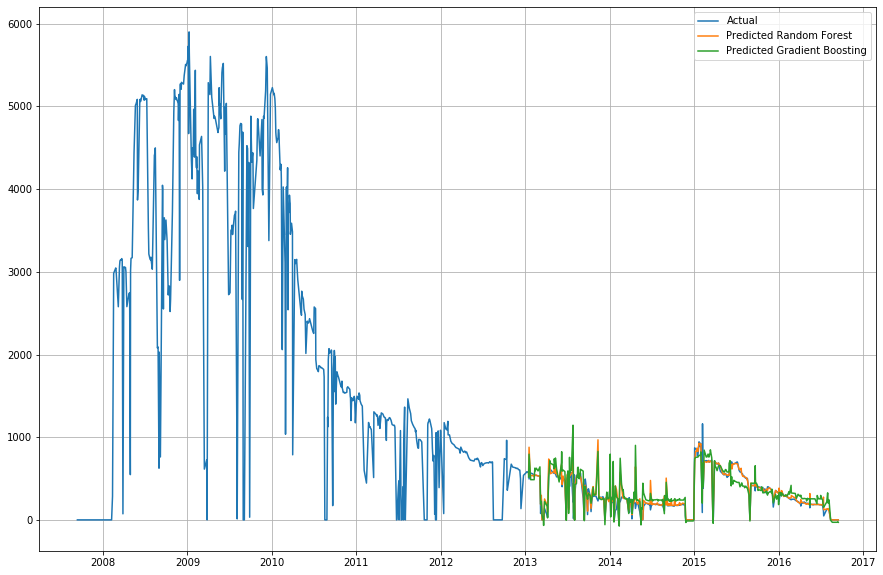

In [127]:
plt.figure(figsize=(15,10))
#plt.plot(X_train.index,y_train,label = 'Train')
plt.plot(X_test.index,y_test,label= 'Actual')
plt.plot(X_test.index[600:],y_predict_RF[600:],label = 'Predicted Random Forest')
plt.plot(X_test.index[600:],y_predict_GB[600:],label = 'Predicted Gradient Boosting')
plt.grid()
plt.legend()

### Neural

In [128]:
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras import layers

In [129]:
df.head()

,NPD_WELL_BORE_CODE,NPD_WELL_BORE_NAME,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_GAS_VOL,BORE_WAT_VOL,Injection Hours F-4,Water Injection F-4,Injection Hours F-5,Water Injection F-5,Total Water Injection,BORE_OIL_VOL
DATEPRD,,,,,,,,,,,,,,,,,,,
2007-09-01,5599,15/9-F-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
2007-09-02,5599,15/9-F-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
2007-09-03,5599,15/9-F-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
2007-09-04,5599,15/9-F-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0
2007-09-05,5599,15/9-F-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0,0.0


In [130]:
to_drop =["BORE_GAS_VOL",'AVG_DOWNHOLE_PRESSURE',
          'AVG_DOWNHOLE_TEMPERATURE','NPD_WELL_BORE_CODE',
          'NPD_WELL_BORE_NAME','Water Injection F-4', 'Injection Hours F-5',
          'Injection Hours F-4','Water Injection F-5','AVG_CHOKE_SIZE_P']





#to_drop =["BORE_GAS_VOL",'AVG_DOWNHOLE_PRESSURE',
#          'AVG_DOWNHOLE_TEMPERATURE','NPD_WELL_BORE_CODE',
 #         'NPD_WELL_BORE_NAME','Water Injection F-4', 
#          'Injection Hours F-5','AVG_CHOKE_SIZE_P','Injection Hours F-4','Water Injection F-5',
#          'BORE_OIL_VOL','BORE_WAT_VOL']
#

In [131]:
dfnn= df.drop(to_drop,axis = 1)

In [132]:
dfnn

,ON_STREAM_HRS,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_WAT_VOL,Total Water Injection,BORE_OIL_VOL
DATEPRD,,,,,,,,,
2007-09-01,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0,0.0
2007-09-02,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0,0.0
2007-09-03,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0,0.0
2007-09-04,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0,0.0
2007-09-05,0.0,0.0,0.000,0.0,0.0,0.000,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...
2016-09-13,0.0,0.0,19.959,0.0,0.0,0.013,0.0,0,0.0
2016-09-14,0.0,0.0,19.959,0.0,0.0,0.016,0.0,1811,0.0
2016-09-15,0.0,0.0,19.959,0.0,0.0,0.024,0.0,4469,0.0


In [133]:
#df_train = df.iloc[:3000, :]
#df_test = df.iloc[3000: , :]

In [134]:
from sklearn.model_selection import train_test_split
df_train,df_test, train_labels,test_labels = train_test_split(X, y,test_size = 0.3,shuffle=True)



In [135]:
df_test = df_test.sort_index()
test_labels = test_labels.sort_index()

In [136]:
train_stats = df_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
ON_STREAM_HRS,2313.0,20.031049,8.285528,0.0,23.830,24.000,24.0000,25.000
AVG_DP_TUBING,2313.0,82.431780,74.386922,0.0,32.258,38.194,170.8490,314.409
AVG_ANNULUS_PRESS,2313.0,16.249588,7.339713,0.0,12.493,17.371,20.5560,30.020
AVG_WHP_P,2313.0,45.728381,26.030183,0.0,32.211,37.639,59.2070,137.311
AVG_WHT_P,2313.0,74.335888,26.233920,0.0,76.676,81.772,89.9825,92.459
DP_CHOKE_SIZE,2313.0,18.612654,22.586800,0.0,3.705,7.073,26.8300,124.123
Total Water Injection,2313.0,9272.212278,4862.225272,0.0,7370.000,9716.000,12536.0000,18020.000


In [137]:
def norm(x):
  return (x-train_stats['mean'])/train_stats['std']
normed_train_data = norm(df_train)
normed_test_data = norm(df_test)

In [138]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64,activation = tf.nn.relu,input_shape=[len(df_train.keys())]),
        layers.Dense(64,activation = tf.nn.relu),
        layers.Dense(1)
    ])
    optimizer = tf.keras.optimizers.RMSprop(0.001)
    model.compile(loss = 'mse',optimizer = optimizer,metrics=['mae','mse'])
    return model

In [139]:
model = build_model()

In [140]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                512       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


In [141]:
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs):
    if epoch % 100 ==0: print("")
    print('.',end = '')
EPOCHS = 1000
history = model.fit(
    normed_train_data, train_labels,
    epochs = EPOCHS, validation_split = 0.2, verbose = 0,
    callbacks = [PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [142]:
hist = pd.DataFrame(history.history)
hist['epoch']= history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,65430.130344,159.001694,65430.128906,66186.832740,167.692123,66186.835938,995
996,65517.034388,160.038788,65517.042969,65208.916332,159.220520,65208.914062,996
997,64635.858666,158.187027,64635.839844,65751.357991,159.569977,65751.359375,997
998,64752.343003,159.104523,64752.351562,67770.688791,167.613861,67770.687500,998
999,65049.856413,159.126053,65049.859375,65230.107536,162.386276,65230.117188,999


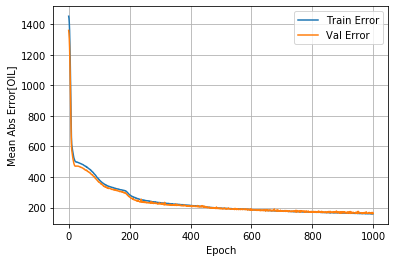

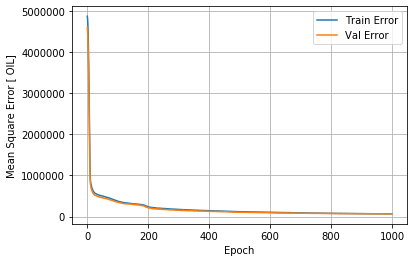

In [143]:
import matplotlib.pyplot as plt
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error[OIL]')
  plt.plot(hist['epoch'],hist['mae'],
           label = 'Train Error')
  plt.plot(hist['epoch'],hist['val_mae'],
           label = 'Val Error')
  plt.legend()
  plt.grid()
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [ OIL]')
  plt.plot(hist['epoch'],hist['mse'],label = 'Train Error')
  plt.plot(hist['epoch'],hist['val_mse'],label = 'Val Error')
  plt.legend()
  plt.grid()

plot_history(history)

In [144]:
loss, mae , mse = model.evaluate(normed_test_data, test_labels, verbose = 0)
print('Mean Absolute Error', mae)
print('Mean Square Error', mse)

Mean Absolute Error 161.24005
Mean Square Error 75450.62


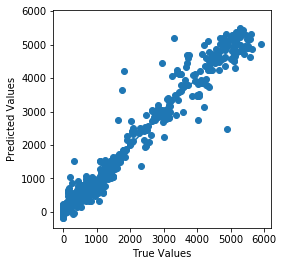

In [145]:
test_predictions = model.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.axis('square')
_ = plt.plot([0,4000],[0,4000])

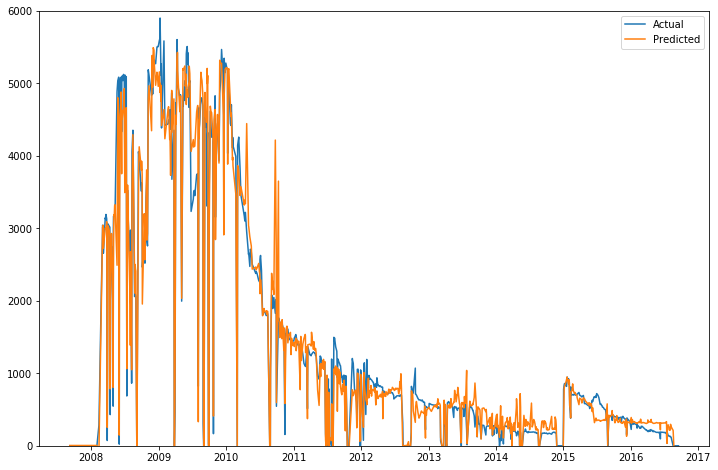

In [146]:
plt.figure(figsize=(12,8))
#plt.plot(df_train.index,train_labels)
plt.plot(df_test.index,test_labels,label= 'Actual')
plt.plot(df_test.index,test_predictions,label = 'Predicted')
plt.ylim(0,6000)
plt.legend()

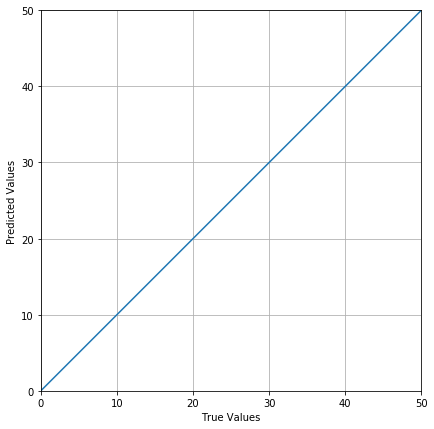

In [147]:
plt.figure(figsize=(7,7))
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.axis('equal')
plt.axis('square')
plt.plot([0,4000],[0,4000])
plt.xlim(0,50)
plt.ylim(0,50)
plt.grid()